In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pickle
import pprint
# 사용할 분류기
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix as cm, classification_report as cr

In [2]:
# 전처리가 완료된 코드들
x_train = np.load("train_benford.npy")
x_val = np.load("val_benford.npy")
x_test = np.load("test_benford.npy")

바로 테스트에 적용할 계획이기 때문에 train-val 을 합쳐준다

In [3]:
x_train = x_train / x_train.sum(axis=1)[:, None]
x_val = x_val / x_val.sum(axis=1)[:, None]
x_test = x_test / x_test.sum(axis=1)[:, None]

x_train = np.concatenate([x_train, x_val], axis=0)
del x_val

In [4]:
y_train = pd.read_csv("../imageCSV/train_truncated.csv").label.values
y_val = pd.read_csv("../imageCSV/val_truncated.csv").label.values
y_test = pd.read_csv("../imageCSV/test_truncated.csv").label.values

In [5]:
y_train = np.concatenate([y_train, y_val])


# 그래프 관련

In [6]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [6]:
plt.style.use("seaborn-v0_8")

In [7]:
128 * 207

26496

<BarContainer object of 9 artists>

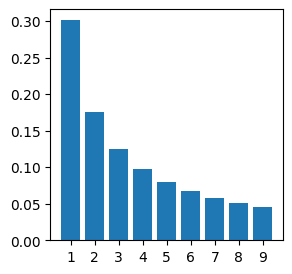

In [6]:
x = np.arange(1, 10)
benford = np.log10(1 + 1 / x)

plt.figure(figsize=(3, 3))
plt.xticks(x)
plt.bar(x, benford)

In [ ]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)
ax1.set_title('real')
ax2.set_title('fake')
ax1.bar(x, benford, color='blue')
ax2.bar(x, benford, color='blue')
for r, m in zip(x_train[y_train == 0], x_train[y_train == 1]):
    ax1.plot(x, r)
    ax2.plot(x, m)

In [15]:
real_mean = x_train[y_train == 0].mean(axis=0)
fake_mean = x_train[y_train == 1].mean(axis=0)

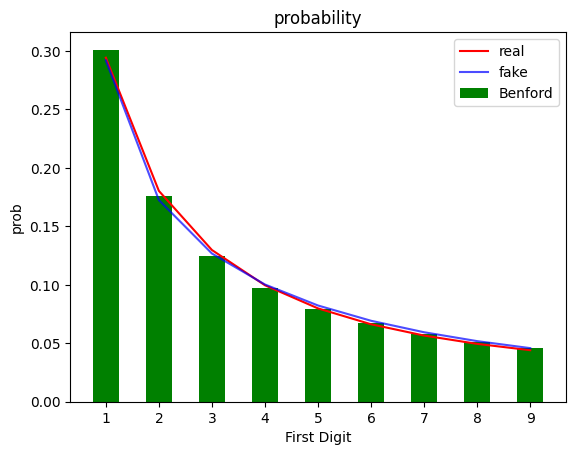

In [52]:
# plt.figure(figsize=(5, 5))
x = np.arange(1, 10)
benford = np.log10(1 + 1 / x)

plt.ylabel("prob", )
plt.xlabel("First Digit", )
plt.xticks(x)
plt.bar(x, benford,width=0.5, color='green', label='Benford')
plt.plot(x, real_mean , alpha=1, label="real", color='red')
plt.plot(x, fake_mean, alpha=0.7, label="fake", color='blue')
plt.title("probability",)
plt.legend()


Text(0.5, 0, 'First Digit')

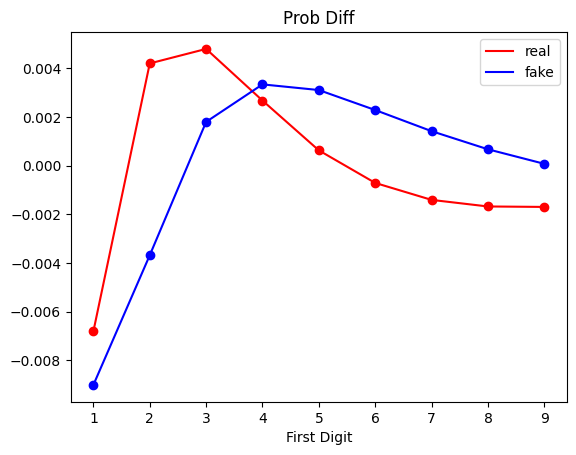

In [53]:
# plt.figure(figsize=(5, 5))
plt.plot(x, real_mean - benford, label="real", color='r')
plt.scatter(x, real_mean - benford, color='r')
plt.plot(x, fake_mean - benford, label="fake", color='b')
plt.scatter(x, fake_mean - benford,  color='b')
plt.xticks(x)
plt.legend()
plt.title("Prob Diff")
plt.xlabel("First Digit")
# plt.ylabel("prob diff")

# 코드 관련

In [ ]:
rf = RandomForestClassifier(verbose=1, n_jobs=-1)

In [ ]:
rf.fit(x_train, y_train)

In [17]:
rf_pred = rf.predict_proba(x_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


## Test : Random Forest

In [23]:
print(cm(y_true=y_test, y_pred=y_pred))
print(cr(y_true=y_test, y_pred=y_pred))

[[10388  2936]
 [ 2384 10692]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.80     13324
           1       0.78      0.82      0.80     13076

    accuracy                           0.80     26400
   macro avg       0.80      0.80      0.80     26400
weighted avg       0.80      0.80      0.80     26400



In [ ]:
rf_cm = cm(y_true=y_test, y_pred=y_pred)

In [ ]:
rf_cm /  rf_cm.sum(axis=0)

In [15]:
svc =  SVC(random_state=0,verbose=1,probability=True)

In [16]:
svc.fit(x_train, y_train)

[LibSVM]...................................
*.
*
optimization finished, #iter = 35880
obj = -61689.436400, rho = 13.832676
nSV = 63273, nBSV = 63260
Total nSV = 63273
...................................
*.
**.
*
optimization finished, #iter = 36104
obj = -61839.126074, rho = 13.237518
nSV = 63408, nBSV = 63394
Total nSV = 63408
...................................
*.
*
optimization finished, #iter = 36187
obj = -61667.294553, rho = 13.384099
nSV = 63238, nBSV = 63225
Total nSV = 63238
...................................
*.
*
optimization finished, #iter = 35945
obj = -61508.328443, rho = 13.685258
nSV = 63101, nBSV = 63089
Total nSV = 63101
...................................
*.
*
optimization finished, #iter = 36067
obj = -61730.645248, rho = 13.335716
nSV = 63304, nBSV = 63289
Total nSV = 63304
.............................................
*.
*
optimization finished, #iter = 45665
obj = -76643.977805, rho = -16.037296
nSV = 78869, nBSV = 78849
Total nSV = 78869


SVC(probability=True, random_state=0, verbose=1)

In [18]:
svc_pred = svc.predict_proba(x_test)


## Test : Support Vector Machine

In [25]:
print(cm(y_true=y_test, y_pred=svc_pred))
print(cr(y_true=y_test, y_pred=svc_pred))

[[ 7368  5956]
 [ 2638 10438]]
              precision    recall  f1-score   support

           0       0.74      0.55      0.63     13324
           1       0.64      0.80      0.71     13076

    accuracy                           0.67     26400
   macro avg       0.69      0.68      0.67     26400
weighted avg       0.69      0.67      0.67     26400



In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 20), 
verbose=1, 
early_stopping=True, 
)

In [ ]:
mlp.fit(x_train, y_train)

In [26]:
mlp_pred = mlp.predict_proba(x_test)

## Test : Multi Linear Perceptron

In [27]:
print(cm(y_true=y_test, y_pred=mlp_pred))
print(cr(y_true=y_test, y_pred=mlp_pred))

[[10160  3164]
 [ 2097 10979]]
              precision    recall  f1-score   support

           0       0.83      0.76      0.79     13324
           1       0.78      0.84      0.81     13076

    accuracy                           0.80     26400
   macro avg       0.80      0.80      0.80     26400
weighted avg       0.80      0.80      0.80     26400



In [ ]:
pickle.dump(rf, open("./models/rf.sav", "wb"))
pickle.dump(svc, open("./models/svc.sav", "wb"))
pickle.dump(mlp, open("./models/mlp.sav", "wb"))

In [ ]:
del rf, svc, mlp

In [6]:
# 다시 읽어오려면 이런 식으로 하면 됨
rf = pickle.load(open("./models/rf.sav", "rb"))
svc = pickle.load(open("./models/svc.sav", "rb"))
mlp = pickle.load(open("./models/mlp.sav", "rb"))

In [8]:
# styleGAN-XL 테스트 데이터를 받아서 테스트 후 confusion matrix 다시 확인
test_XL = np.load("test_XL_benford.npy")
test_XL = test_XL / test_XL.sum(axis=1)[:,None]
y_XL_test = pd.read_csv("../csv_window_sy/test_XL_sy.csv").label.values

rf_pred = rf.predict(test_XL)
svc_pred = svc.predict(test_XL)
mlp_pred = mlp.predict(test_XL)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


In [20]:
rf_pred_XL = rf.predict_proba(test_XL)
svc_pred_XL = svc.predict_proba(test_XL)
mlp_pred_XL = mlp.predict_proba(test_XL)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


In [27]:
mlp_pred_XL

array([[0.82051828, 0.17948172],
       [0.63496588, 0.36503412],
       [0.86299004, 0.13700996],
       ...,
       [0.95843702, 0.04156298],
       [0.87527265, 0.12472735],
       [0.80234825, 0.19765175]])

In [21]:
np.savez_compressed("./ML_prob.npz", rf_pred=rf_pred, svc_pred=svc_pred, mlp_pred=mlp_pred,
rf_pred_XL=rf_pred_XL, svc_pred_XL=svc_pred_XL, mlp_pred_XL=mlp_pred_XL)

In [ ]:
test_XL.shape

y_XL_test[:6]

# styleGAN-XL : confusion matrix, classification report

## Random Forest

In [30]:
print(cm(y_true=y_XL_test, y_pred=rf_pred))
print(cr(y_true=y_XL_test, y_pred=rf_pred))

[[10388  2936]
 [13068   256]]
              precision    recall  f1-score   support

           0       0.44      0.78      0.56     13324
           1       0.08      0.02      0.03     13324

    accuracy                           0.40     26648
   macro avg       0.26      0.40      0.30     26648
weighted avg       0.26      0.40      0.30     26648



## Support Vector Machine

In [31]:
print(cm(y_true=y_XL_test, y_pred=svc_pred))
print(cr(y_true=y_XL_test, y_pred=svc_pred))

[[ 7368  5956]
 [11681  1643]]
              precision    recall  f1-score   support

           0       0.39      0.55      0.46     13324
           1       0.22      0.12      0.16     13324

    accuracy                           0.34     26648
   macro avg       0.30      0.34      0.31     26648
weighted avg       0.30      0.34      0.31     26648



## Multi Linear Perceptron

In [32]:
print(cm(y_true=y_XL_test, y_pred=mlp_pred))
print(cr(y_true=y_XL_test, y_pred=mlp_pred))

[[10160  3164]
 [13012   312]]
              precision    recall  f1-score   support

           0       0.44      0.76      0.56     13324
           1       0.09      0.02      0.04     13324

    accuracy                           0.39     26648
   macro avg       0.26      0.39      0.30     26648
weighted avg       0.26      0.39      0.30     26648



In [ ]:
plt.style.available

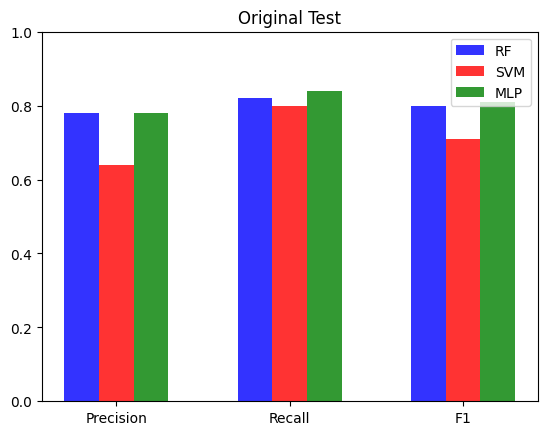

In [9]:
from matplotlib import pyplot as plt
# plt.style.use("ggplot")

topics = ['Precision', 'Recall', 'F1', ]

RF = [0.78, 0.82, 0.80,]
SVM = [0.64, 0.80, 0.71,]
MLP = [0.78, 0.84, 0.81]

def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]

RF_x = create_x(4, 0.8, 1, 3)
SVM_x = create_x(4, 0.8, 2, 3)
MLP_x = create_x(4, 0.8, 3, 3)


ax = plt.subplot()
ax.bar(RF_x, RF, label='RF', color='b', alpha=0.8)
ax.bar(SVM_x, SVM, label="SVM", color='r', alpha=0.8)
ax.bar(MLP_x, MLP, label="MLP", color='g', alpha=0.8)

middle_x = [(a+b+c)/3 for (a,b, c) in zip(RF_x, SVM_x, MLP_x)]
ax.set_xticks(middle_x)
ax.set_xticklabels(topics)

plt.ylim((0, 1))
plt.title("Original Test")
plt.legend(loc=1)
plt.show()

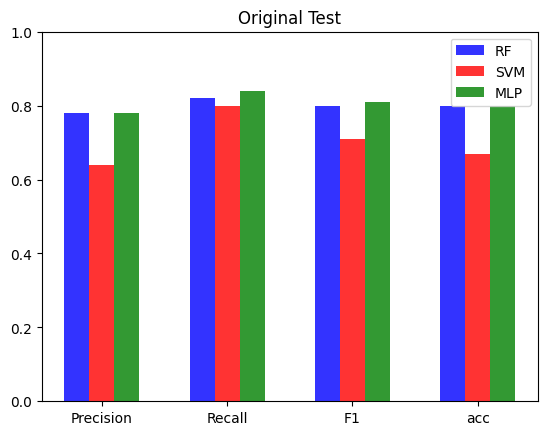

In [33]:
from matplotlib import pyplot as plt
# plt.style.use("ggplot")

topics = ['Precision', 'Recall', 'F1', 'acc']

RF = [0.78, 0.82, 0.80, 0.80]
SVM = [0.64, 0.80, 0.71, 0.67]
MLP = [0.78, 0.84, 0.81, 0.80]

def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]

RF_x = create_x(4, 0.8, 1, 4)
SVM_x = create_x(4, 0.8, 2, 4)
MLP_x = create_x(4, 0.8, 3, 4)


ax = plt.subplot()
ax.bar(RF_x, RF, label='RF', color='b', alpha=0.8)
ax.bar(SVM_x, SVM, label="SVM", color='r', alpha=0.8)
ax.bar(MLP_x, MLP, label="MLP", color='g', alpha=0.8)

middle_x = [(a+b+c)/3 for (a,b, c) in zip(RF_x, SVM_x, MLP_x)]
ax.set_xticks(middle_x)
ax.set_xticklabels(topics)

plt.ylim((0, 1))
plt.title("Original Test")
plt.legend(loc=1)
plt.show()

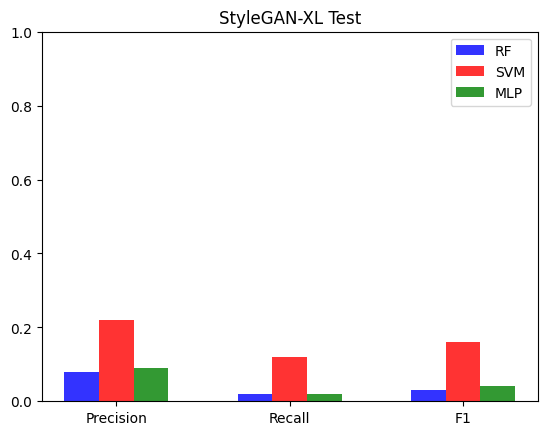

In [10]:
from matplotlib import pyplot as plt
# plt.style.use("ggplot")

topics = ['Precision', 'Recall', 'F1',]

RF = [0.08, 0.02, 0.03,]
SVM = [0.22, 0.12, 0.16,]
MLP = [0.09, 0.02, 0.04]

def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]

RF_x = create_x(4, 0.8, 1, 3)
SVM_x = create_x(4, 0.8, 2, 3)
MLP_x = create_x(4, 0.8, 3, 3)


ax = plt.subplot()
ax.bar(RF_x, RF, label='RF', color='b', alpha=0.8)
ax.bar(SVM_x, SVM, label="SVM", color='r', alpha=0.8)
ax.bar(MLP_x, MLP, label="MLP", color='g', alpha=0.8)

middle_x = [(a+b+c)/3 for (a,b, c) in zip(RF_x, SVM_x, MLP_x)]
ax.set_xticks(middle_x)
ax.set_xticklabels(topics)

plt.ylim((0, 1))
plt.title("StyleGAN-XL Test")
plt.legend(loc=1)
plt.show()

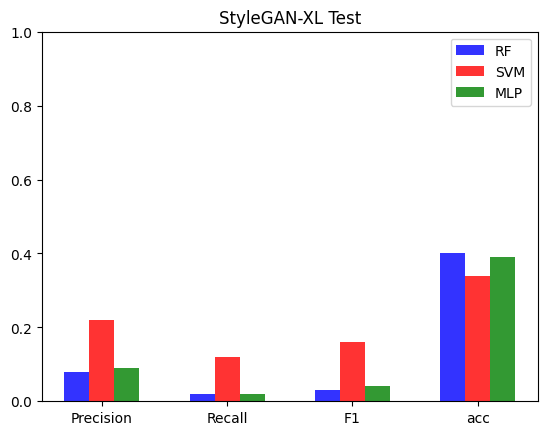

In [34]:
from matplotlib import pyplot as plt
# plt.style.use("ggplot")

topics = ['Precision', 'Recall', 'F1', 'acc']

RF = [0.08, 0.02, 0.03, 0.4]
SVM = [0.22, 0.12, 0.16, 0.34]
MLP = [0.09, 0.02, 0.04, 0.39]

def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]

RF_x = create_x(4, 0.8, 1, 4)
SVM_x = create_x(4, 0.8, 2, 4)
MLP_x = create_x(4, 0.8, 3, 4)


ax = plt.subplot()
ax.bar(RF_x, RF, label='RF', color='b', alpha=0.8)
ax.bar(SVM_x, SVM, label="SVM", color='r', alpha=0.8)
ax.bar(MLP_x, MLP, label="MLP", color='g', alpha=0.8)

middle_x = [(a+b+c)/3 for (a,b, c) in zip(RF_x, SVM_x, MLP_x)]
ax.set_xticks(middle_x)
ax.set_xticklabels(topics)

plt.ylim((0, 1))
plt.title("StyleGAN-XL Test")
plt.legend(loc=1)
plt.show()

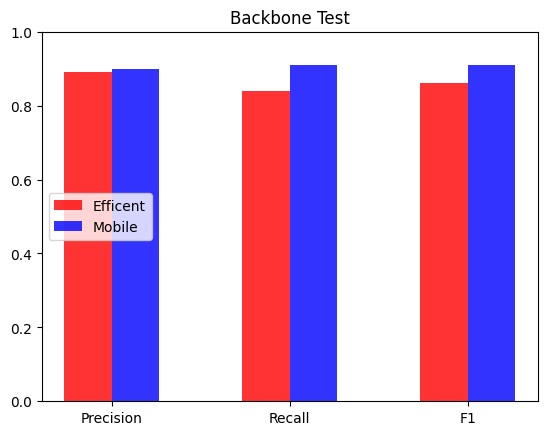

In [5]:
from matplotlib import pyplot as plt
# plt.style.use("ggplot")

topics = ['Precision', 'Recall', 'F1',]

Efficent = [0.89, 0.84, 0.86,]
Mobile = [0.90, 0.91, 0.91,]
# MLP = [0.09, 0.02, 0.04]

def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]

Efficent_x = create_x(3, 0.8, 1, 3)
Mobile_x = create_x(3, 0.8, 2, 3)
# MLP_x = create_x(4, 0.8, 3, 3)


ax = plt.subplot()
ax.bar(Efficent_x, Efficent, label='Efficent', color="red", alpha=0.8)
ax.bar(Mobile_x, Mobile, label="Mobile", color='blue', alpha=0.8)
# ax.bar(MLP_x, MLP, label="MLP")

middle_x = [(a+b)/2 for (a,b) in zip(Efficent_x, Mobile_x)]
ax.set_xticks(middle_x)
ax.set_xticklabels(topics)

plt.ylim((0, 1))
plt.title("Backbone Test")
plt.legend(loc=6)
plt.show()